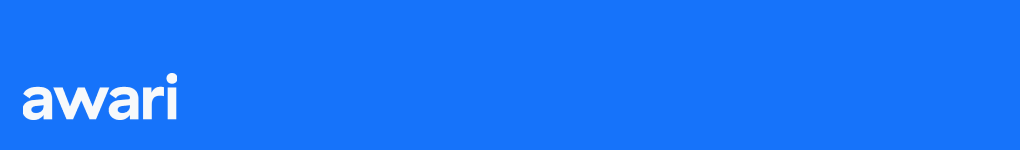

Esta é a tarefa proposta para a **Aula 5: Iniciando Tratamento de Dados**, do curso de **Engenharia de Dados** da **[Awari](https://awari.com.br/)**.

---

# O que fazer?
##### A atividade vai ao encontro do que foi visto em aula, sobre tratamento e limpeza de dados usando Pandas. O passo a passo consiste em::

1. Fazer download do dataset [Top Youtube Artists](https://www.kaggle.com/datasets/themrityunjaypathak/top-youtube-artist), do Kaggle.
2. Tratar as colunas sem informação adicionando o texto “Não informado”.
3. Formatar a coluna de total de views multiplicando por 1 milhão.
4. Formatar coluna “AVG” para 2 casas decimais depois da vírgula.
5. Mostrar os top 10 usuários.
6. Mostrar primeiros 100 usuários por nome decrescente.
7. Salvar um novo CSV com a informação tratada.


# Instalando bibliotecas

In [5]:
!pip install pandas
!pip install numpy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77716 sha256=505f442acf1c0685e6ca9ba8137688a762a35549b5936be7041e00b71486a7ee
  Stored in directory: /home/jovyan/.cache/pip/wheels/f3/16/ff/34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle


# Importando bibliotecas

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1º Passo

##### Baixando e importando o dataset do Kaggle

Acesse este [link](https://www.kaggle.com/datasets/themrityunjaypathak/top-youtube-artist), baixe o dataset e armazene na pasta "./arquivos/". Depois execute o comando abaixo.

In [12]:
df = pd.read_csv('arquivos/topyoutube.csv')

df

,Artist,Total Views,100M,Avg
0,BTS,"27,947.9",63.0,7.370
1,Bad Bunny,"27,573.4",66.0,14.555
2,Justin Bieber,"27,399.7",37.0,3.986
3,Ed Sheeran,"26,894.0",39.0,4.609
4,Taylor Swift,"24,350.0",38.0,5.716
...,...,...,...,...
1582,Pietro Lombardi,204.1,NaN,0.022
1583,Duffy,203.2,NaN,0.020
1584,Psirico,201.1,1.0,0.039
1585,Alex Clare,200.8,NaN,0.020


## 2º Passo
##### Tratando as colunas sem informação adicionando o texto “Não informado”.

In [13]:
df.fillna("Não informado", inplace=True)

In [14]:
df

,Artist,Total Views,100M,Avg
0,BTS,"27,947.9",63.0,7.370
1,Bad Bunny,"27,573.4",66.0,14.555
2,Justin Bieber,"27,399.7",37.0,3.986
3,Ed Sheeran,"26,894.0",39.0,4.609
4,Taylor Swift,"24,350.0",38.0,5.716
...,...,...,...,...
1582,Pietro Lombardi,204.1,Não informado,0.022
1583,Duffy,203.2,Não informado,0.020
1584,Psirico,201.1,1.0,0.039
1585,Alex Clare,200.8,Não informado,0.020


## 3º Passo

##### Formatar a coluna de total de views multiplicando por 1 milhão.

In [15]:
# Substituindo a vírgula por nada para converter corretamente para float
df['Total Views'] = df['Total Views'].str.replace(',', '').astype(float)

# Agora multiplicando por 1.000.000
df['Total Views'] = df['Total Views'] * 1000000

In [16]:
df

,Artist,Total Views,100M,Avg
0,BTS,2.794790e+10,63.0,7.370
1,Bad Bunny,2.757340e+10,66.0,14.555
2,Justin Bieber,2.739970e+10,37.0,3.986
3,Ed Sheeran,2.689400e+10,39.0,4.609
4,Taylor Swift,2.435000e+10,38.0,5.716
...,...,...,...,...
1582,Pietro Lombardi,2.041000e+08,Não informado,0.022
1583,Duffy,2.032000e+08,Não informado,0.020
1584,Psirico,2.011000e+08,1.0,0.039
1585,Alex Clare,2.008000e+08,Não informado,0.020


## 4º Passo

##### Formatar coluna “AVG” para 2 casas decimais depois da vírgula.

In [17]:
df['Avg'] = df['Avg'].round(2)

In [18]:
df

,Artist,Total Views,100M,Avg
0,BTS,2.794790e+10,63.0,7.37
1,Bad Bunny,2.757340e+10,66.0,14.56
2,Justin Bieber,2.739970e+10,37.0,3.99
3,Ed Sheeran,2.689400e+10,39.0,4.61
4,Taylor Swift,2.435000e+10,38.0,5.72
...,...,...,...,...
1582,Pietro Lombardi,2.041000e+08,Não informado,0.02
1583,Duffy,2.032000e+08,Não informado,0.02
1584,Psirico,2.011000e+08,1.0,0.04
1585,Alex Clare,2.008000e+08,Não informado,0.02


## 5º Passo

##### Mostrar os top 10 usuários.

In [19]:
print(df.sort_values('Total Views', ascending=False).head(10))

          Artist   Total Views  100M    Avg
0            BTS  2.794790e+10  63.0   7.37
1      Bad Bunny  2.757340e+10  66.0  14.56
2  Justin Bieber  2.739970e+10  37.0   3.99
3     Ed Sheeran  2.689400e+10  39.0   4.61
4   Taylor Swift  2.435000e+10  38.0   5.72
5        Shakira  2.396180e+10  43.0   7.84
6     Katy Perry  2.355340e+10  25.0   3.18
7          Ozuna  2.252480e+10  49.0   4.93
8         Eminem  2.093770e+10  38.0   5.84
9  Ariana Grande  2.061850e+10  37.0   3.37


## 6º Passo

##### Mostrar primeiros 100 usuários por nome decrescente.

In [21]:
pd.set_option('display.max_rows', 100)

print(df.sort_values('Artist', ascending=False).head(100))

                          Artist   Total Views           100M   Avg
1374                      Łobuzy  3.965000e+08            2.0  0.11
537                  İrem Derici  1.717300e+09            3.0  0.32
634                   Ñengo Flow  1.388800e+09            4.0  0.82
1032               Çağatay Akman  7.427000e+08            2.0  0.05
350                    will.i.am  2.582000e+09            6.0  0.30
56             twenty one pilots  1.014770e+10           14.0  2.03
1088                    t.A.T.u.  6.698000e+08            2.0  0.22
1184                      miss A  5.748000e+08            1.0  0.06
401                         iKON  2.247100e+09            3.0  0.32
954                        gnash  8.347000e+08            1.0  0.20
1215                        f(x)  5.449000e+08            1.0  0.04
955                     deadmau5  8.342000e+08  Não informado  0.09
464                    blink-182  1.962000e+09            5.0  0.45
1223                 back number  5.366000e+08  

## 7º Passo

##### Salvar um novo CSV com a informação tratada.

In [25]:
df.to_csv('./arquivos/topyoutube_modificado.csv', index=False)

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**